## Exploratory Data Analysis (EDA):

### Import Liabraries :

In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns

Load the dataset into a pandas DataFrame:

In [2]:
data_path = "../raw_data/aw_fb_data.csv"

df = pd.read_csv(data_path)

df

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [3]:
df.shape

(6264, 20)

In [4]:
df.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
device                   object
activity                 object
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [6]:
target = df['activity']
feature=df.drop(columns = 'activity')
print(target)

0                Lying
1                Lying
2                Lying
3                Lying
4                Lying
             ...      
6259    Running 7 METs
6260    Running 7 METs
6261    Running 7 METs
6262    Running 7 METs
6263    Running 7 METs
Name: activity, Length: 6264, dtype: object


In [7]:
df.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


### Data Cleaning :

In [8]:
df.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
print(df.duplicated().sum())

0


Splitting Data as Apple and Fitbit :

In [11]:
df_aw=df[df['device']=='apple watch']
df_fb=df[df['device']=='fitbit']

In [12]:
df_aw.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [13]:
df_fb.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
3656,3657,1,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,fitbit,Lying
3657,3658,2,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,fitbit,Lying
3658,3659,3,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,fitbit,Lying
3659,3660,4,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,fitbit,Lying
3660,3661,11,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,fitbit,Self Pace walk


In [14]:
df_fb['activity'].value_counts()

activity
Lying             592
Running 7 METs    501
Running 5 METs    399
Running 3 METs    378
Sitting           378
Self Pace walk    360
Name: count, dtype: int64

In [15]:
df_aw['activity'].value_counts()

activity
Lying             787
Running 7 METs    613
Running 5 METs    603
Running 3 METs    572
Sitting           552
Self Pace walk    529
Name: count, dtype: int64

In [16]:
df_num= df.select_dtypes(include="number")

<Axes: >

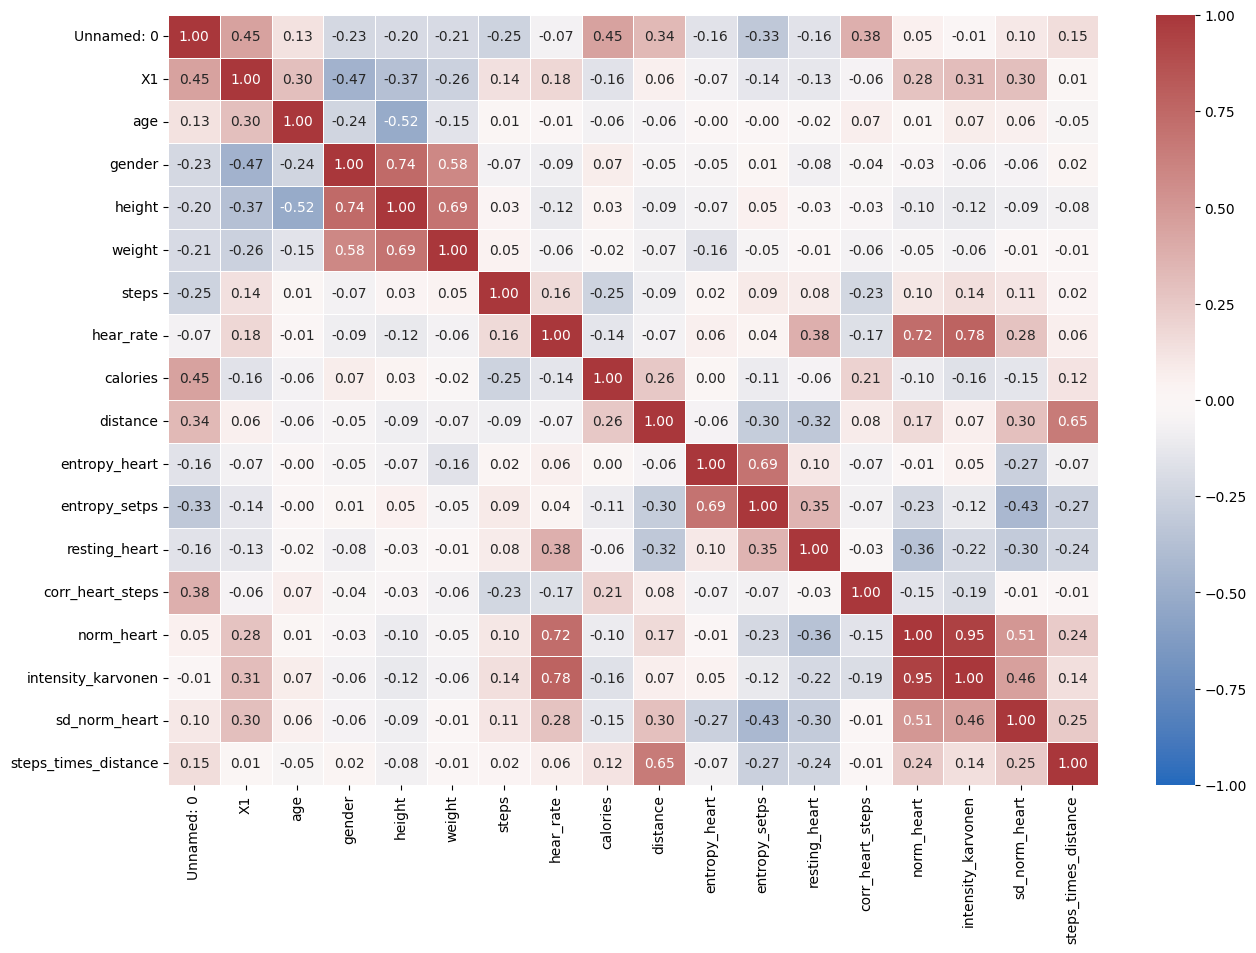

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

<Axes: xlabel='device', ylabel='activity'>

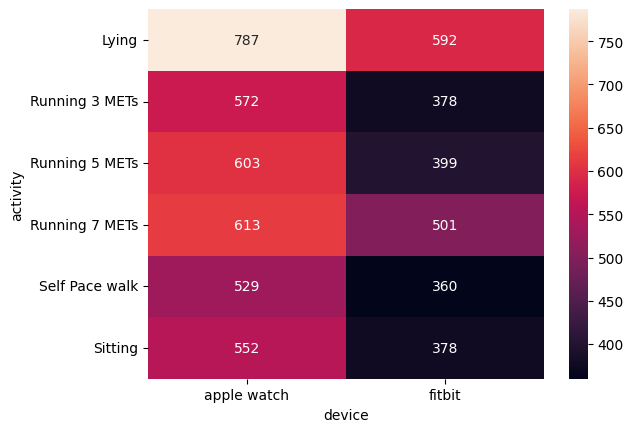

In [18]:
sns.heatmap(pd.crosstab(df["activity"],df["device"]),annot=True,fmt='d')

In [19]:
df.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'X1'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>],
       [<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>],
       [<Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>,
        <Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>],
       [<Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>, <Axes: >,
        <Axes: >]], dtype=object)

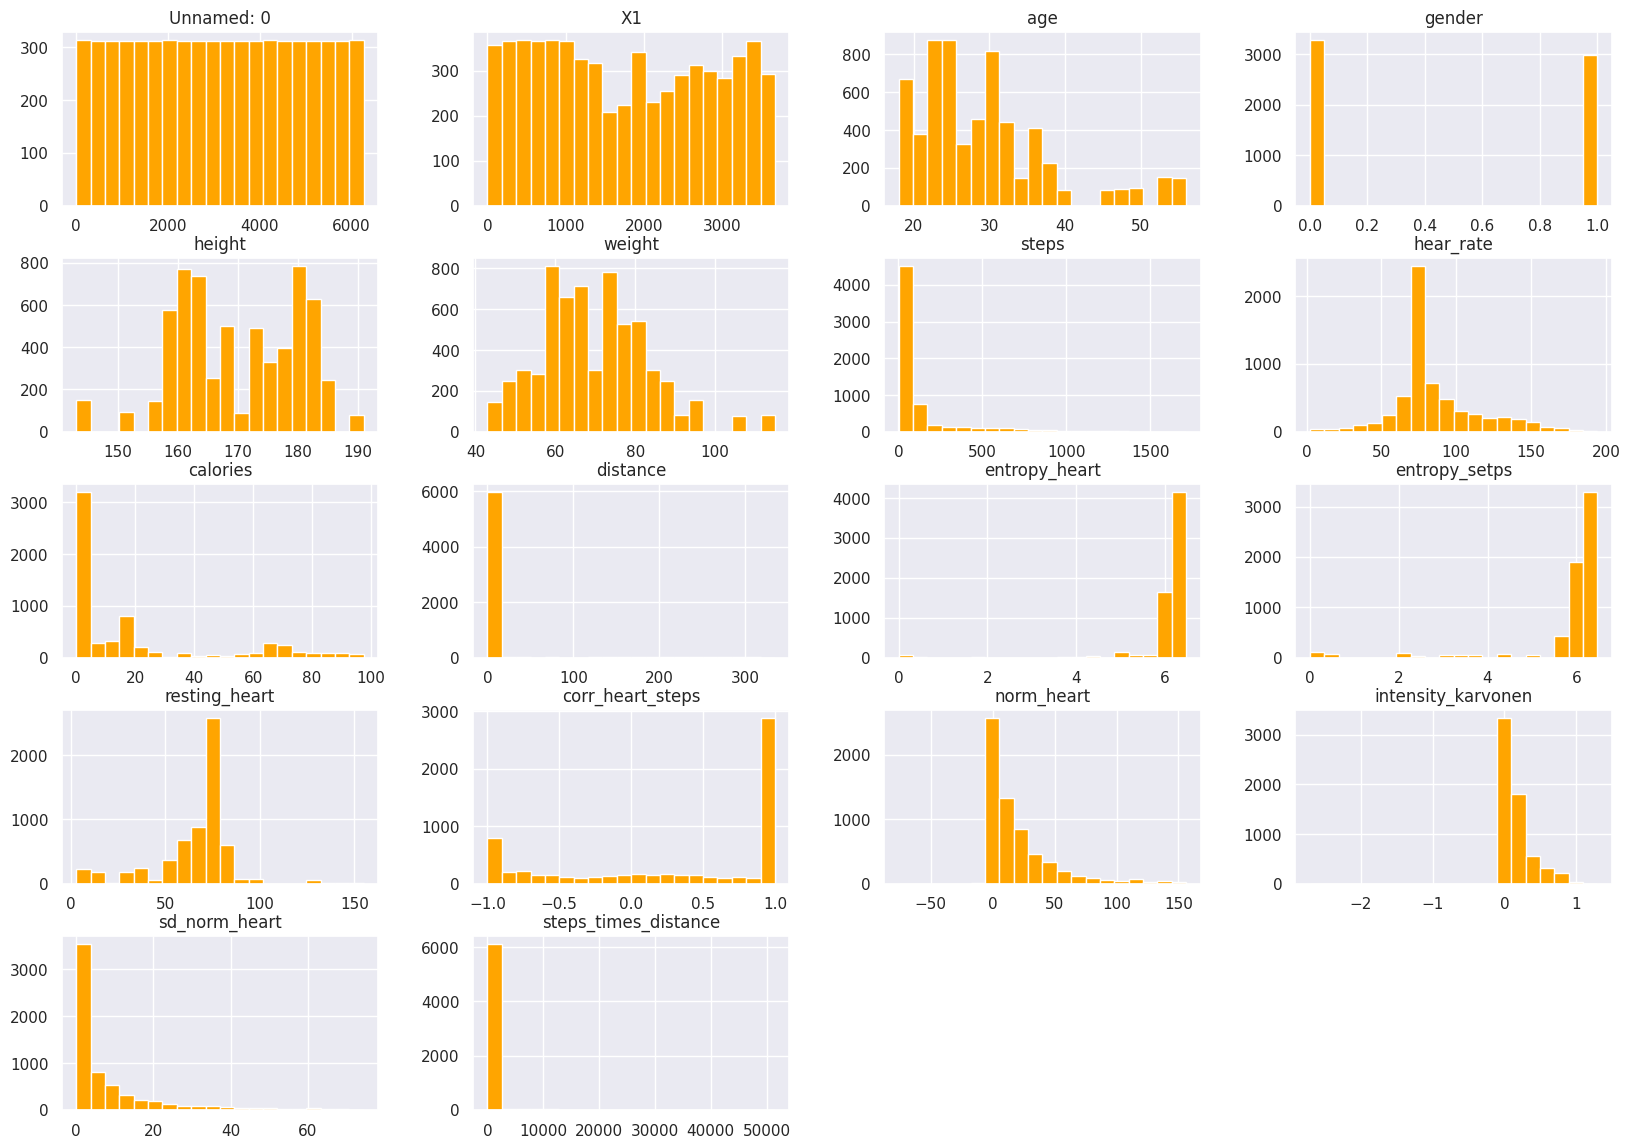

In [20]:
sns.set(font_scale = 1)

df.hist(bins = 20, color = 'orange', figsize = (20, 14))

## Feature Engineering

### Create a unique identifyer for each participant

In [21]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [22]:
df.insert(loc=0, column='participant_id', value = df.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [23]:
df

,participant_id,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,...,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,...,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,...,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,1,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,...,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,1,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,...,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,1,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,...,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,49,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,...,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,49,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,...,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,49,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,...,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,49,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,...,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [24]:
df.groupby('participant_id').count()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
participant_id,,,,,,,,,,,,,,,,,,,,
1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
3,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
4,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
5,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
6,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156
7,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
8,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
9,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


In [25]:
df['bmi'] = round(df.weight / (df.height/100)**2)
df.head()

,participant_id,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,...,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,1,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,...,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,...,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,1,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,...,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,1,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,...,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,1,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,...,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


Pairplot with core features

In [26]:
df.columns

Index(['participant_id', 'Unnamed: 0', 'X1', 'age', 'gender', 'height',
       'weight', 'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart',
       'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart',
       'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance', 'device',
       'activity', 'bmi'],
      dtype='object')

In [27]:
df_core_features = df[['participant_id','age', 'gender', 'height','weight', 'steps', 'hear_rate', 'calories', 'distance', 'bmi']]

df_core_features

,participant_id,age,gender,height,weight,steps,hear_rate,calories,distance,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,23.0
...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0


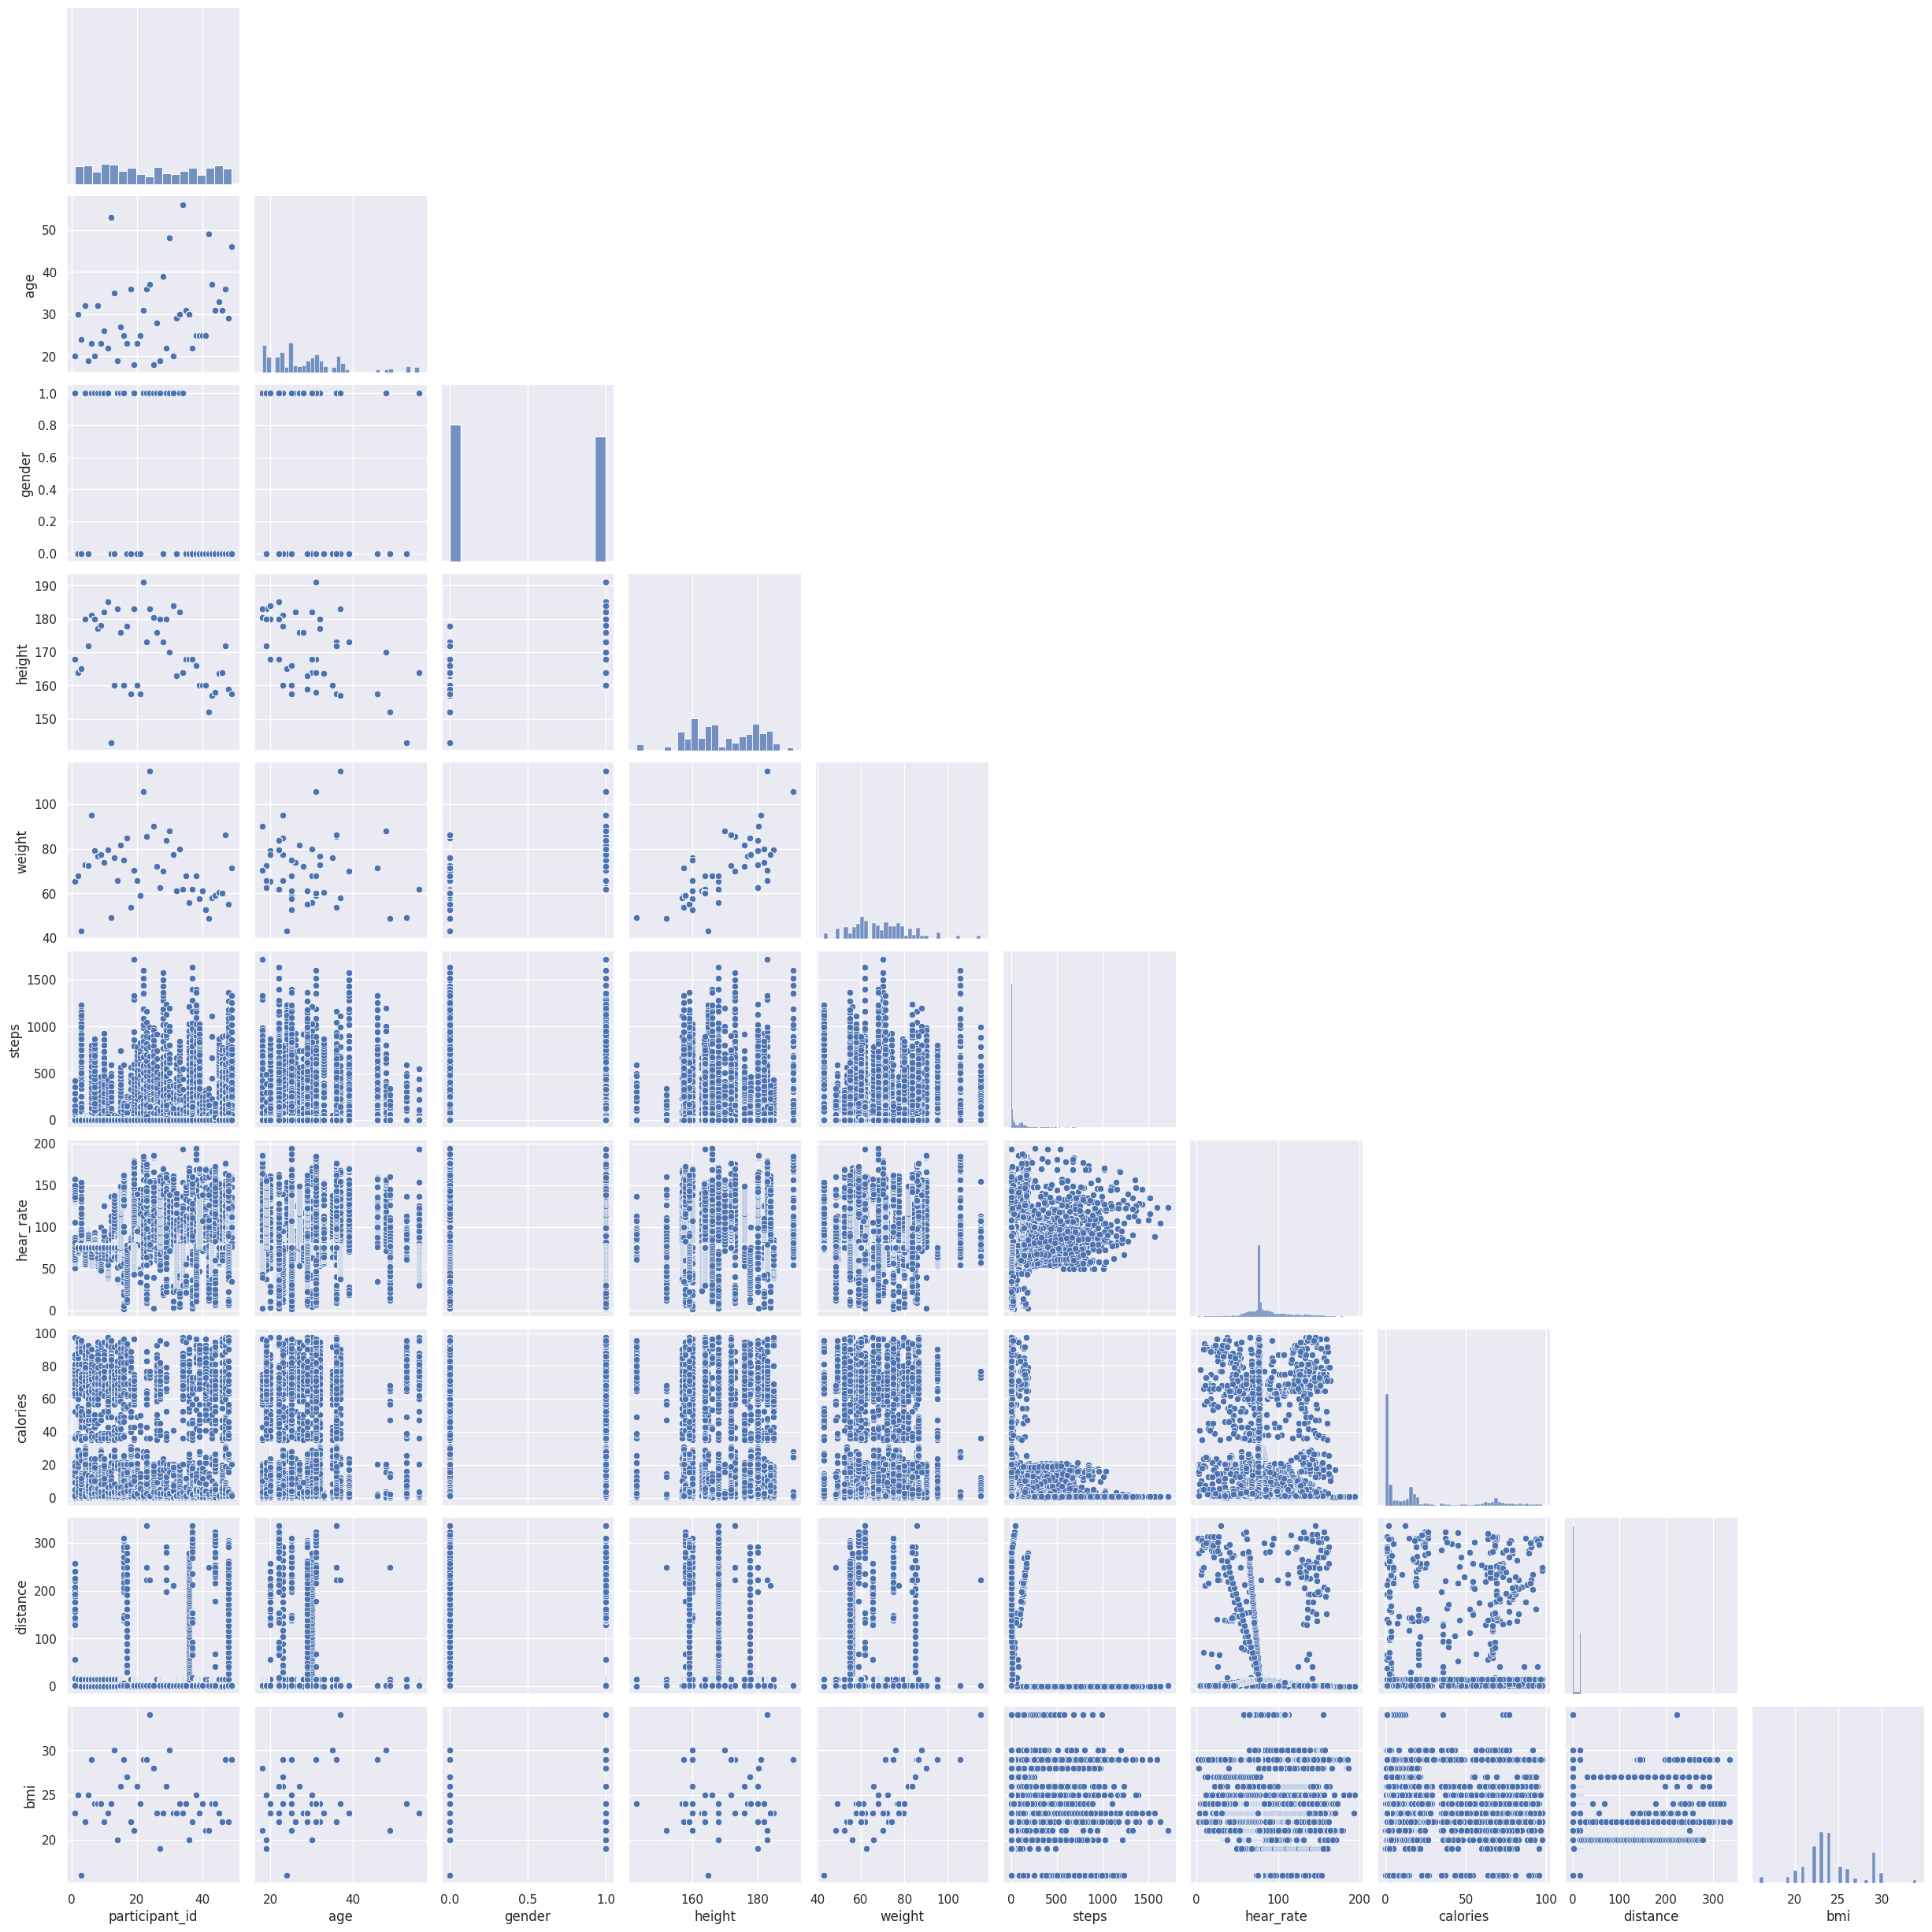

In [28]:
sns.pairplot(df_core_features, corner = True)